In [52]:
import cv2
import imutils
import pytesseract
from matplotlib.pyplot import imshow, show, subplot, title, get_cmap
from skimage.color import rgb2gray, gray2rgb, rgb2hsv, rgb2lab, lab2rgb


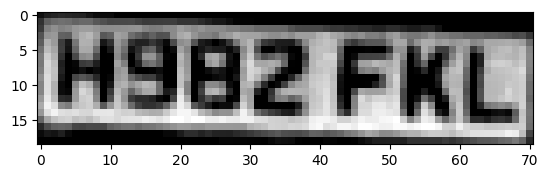

In [53]:
carImage = cv2.imread("../Codes/plate.png")
_ , carImage = cv2.threshold(carImage,100,255,cv2.THRESH_BINARY)
imshow(carImage)


In [54]:
# Assuming you have imported the necessary libraries and have the 'carImage' variable containing the license plate image.

# Perform some pre-processing on the image
gray_img = cv2.cvtColor(carImage, cv2.COLOR_BGR2GRAY)
gray_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

# Find contours in the image
contours, _ = cv2.findContours(gray_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by their x-coordinate
contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

# Initialize an empty string to store the license plate characters
license_plate = ""

# Loop through each contour and perform OCR
for contour in contours:
    # Get the bounding rectangle of the contour
    x, y, w, h = cv2.boundingRect(contour)
    
    # Extract the character region from the image
    character_img = gray_img[y:y+h, x:x+w]
    pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

    # Perform OCR using Tesseract
    character = pytesseract.image_to_string(character_img, config='--psm 10 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
    
    # Append the recognized character to the license plate string
    license_plate += character

# Print the license plate
print("License Plate:", license_plate)

License Plate: H9B2FKL

